<a href="https://colab.research.google.com/github/manashpratim/Quora-Insincere-Questions-Classification/blob/master/Quora_Insincere_Questions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Downloading the Datasets
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10737/290346/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562496110&Signature=MoI4MS2ahHrnKTYhBs6GyCrawyQLaC6muis0M%2FcaHl54q1L6RnwVwc1ElWHX3UcZQToj1YhnmIg4Nm4veYgmbE%2BGU6qwWqlejyUCrRpIZCdrvO9QoCCW52zqjxWFJpJV2QuM7pj7C7gCAjqX9CzlP0OVWesj9tGD5GSRC9wQDfWPezEXUuI08LzWOt02rbexmuNZt7axZ%2B96EKGvBhBHCzndeC75CPNYRVjVs6evEoDUyzM7%2BTtA1R8JgwQgeBJtoEdxQ15OYFaU%2FOGMLePEPzf5XkcU8tI84BFzKLlc%2FDTewheg%2F0irr0xoMx6mCLJ%2BGt%2BszJFKVKgdB6zrKuxOLw%3D%3D&response-content-disposition=attachment%3B+filename%3Dquora-insincere-questions-classification.zip"\
      -O "/tmp/quora.zip"

--2019-07-05 01:30:06--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/10737/290346/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562496110&Signature=MoI4MS2ahHrnKTYhBs6GyCrawyQLaC6muis0M%2FcaHl54q1L6RnwVwc1ElWHX3UcZQToj1YhnmIg4Nm4veYgmbE%2BGU6qwWqlejyUCrRpIZCdrvO9QoCCW52zqjxWFJpJV2QuM7pj7C7gCAjqX9CzlP0OVWesj9tGD5GSRC9wQDfWPezEXUuI08LzWOt02rbexmuNZt7axZ%2B96EKGvBhBHCzndeC75CPNYRVjVs6evEoDUyzM7%2BTtA1R8JgwQgeBJtoEdxQ15OYFaU%2FOGMLePEPzf5XkcU8tI84BFzKLlc%2FDTewheg%2F0irr0xoMx6mCLJ%2BGt%2BszJFKVKgdB6zrKuxOLw%3D%3D&response-content-disposition=attachment%3B+filename%3Dquora-insincere-questions-classification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6475626955 (6.0G) [application/zip]
Saving to: ‘/tmp/quora.zip’

/tmp/quora.zip  

In [0]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/quora.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/quora')
zip_ref.close()

In [0]:
# Unzipping the word embeddings
import os
import zipfile

local_zip='/tmp/quora/embeddings.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/quora/embeddings')
zip_ref.close()

In [0]:
#Loading the Dataset
import pandas as pd
df=pd.read_csv('/tmp/quora/train.csv')
df_test=pd.read_csv('/tmp/quora/test.csv')

In [10]:
df.head(3)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0


In [11]:
df_test.head(3)

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...


In [12]:
#Class Distribution
df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [13]:
#Functions for Preprocessing the Dataset
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


def mystopwords(text):
    return ' '.join([w for w in word_tokenize(text) if not w in stop_words])

import re
def clean_text(string):
  clean=re.sub('[\n]',' ',string) #remove newline character
  clean=re.sub('[^a-zA-Z]',' ',clean) #remove non alphabetic characters
  clean=mystopwords(clean) #remove stopwords
  return clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
#Cleaning the data and separating the texts and labels
sentences=[]
labels=[]
for i in range(len(df)):
  labels.append(df['target'][i])
  sentences.append(clean_text(df['question_text'][i]))

In [0]:
test_sentences=[]
for i in range(len(df_test)):
  test_sentences.append(clean_text(df['question_text'][i]))

In [0]:
#Suffling the data and splitting the data into train and test sets (90:10)
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels= train_test_split(sentences, labels, test_size=0.1, shuffle= True)

In [17]:
#Data Summary
print('Length of the Data: ',len(df))
print('No. of Training Examples: ',len(train_sentences))
print('No. of Validation Examples: ',len(val_sentences))
print('No. of Classes: ',df['target'].nunique())

Length of the Data:  1306122
No. of Training Examples:  1175509
No. of Validation Examples:  130613
No. of Classes:  2


# **Bag of Words Models**

## **Multinomial Naive Bayes Classifier**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',MultinomialNB())
                   ])

Test Accuracy using MultiNomial Naive Bayes Classifier:  0.9377703597651076
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    122485
           1       0.00      0.00      0.00      8128

    accuracy                           0.94    130613
   macro avg       0.47      0.50      0.48    130613
weighted avg       0.88      0.94      0.91    130613



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


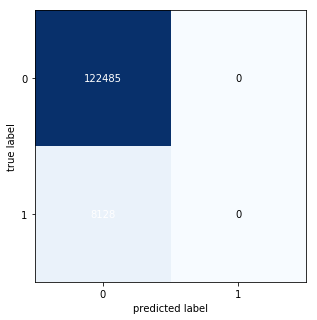

In [16]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using MultiNomial Naive Bayes Classifier: ',accuracy_score(val_labels,pred))

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

### **While the classifier has a high accuracy, it fails to classify  even a single example from the minority class **

## **Support Vector Machines**

In [0]:
from sklearn.svm import SVC
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',SVC())
                   ])

In [0]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using Support Vector Machines: ',accuracy_score(val_labels,pred))

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## **Logistic Regression**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',LogisticRegression())
                   ])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Accuracy using Logistic Regression Classifier:  0.938130201434773
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    122534
           1       0.48      0.00      0.00      8079

    accuracy                           0.94    130613
   macro avg       0.71      0.50      0.49    130613
weighted avg       0.91      0.94      0.91    130613

[[122512     22]
 [  8059     20]]


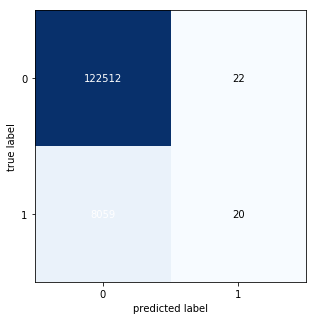

In [23]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using Logistic Regression Classifier: ',accuracy_score(val_labels,pred))

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred))
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## **Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',RandomForestClassifier(n_estimators=200))
                   ])

In [20]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using Random Forest Classifier: ',accuracy_score(val_labels,pred))

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

KeyboardInterrupt: ignored

# **Word Embedding Models**

In [24]:
#Tokenization and Padding
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


embedding_dim = 300
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
vocab_len=49999


tokenizer = Tokenizer(num_words=vocab_len+1,oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)
print('Original Size of Vocabulary: ',vocab_size)

word_index = {e:i for e,i in word_index.items() if i <= vocab_len+1} #Reducing the Size of Vocabulary
print('New Size of Vocabulary: ',len(word_index))

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_labels=np.expand_dims(train_labels, axis=1)
val_labels=np.expand_dims(val_labels, axis=1)


Original Size of Vocabulary:  178863
New Size of Vocabulary:  50000


In [25]:
#Dimension of Data after Tokenizing and Padding
print('Dimension of Training Data: ',train_padded.shape)
print('Dimension of Validation Data: ',val_padded.shape)
print('Dimension of Training Labels: ',train_labels.shape)
print('Dimension of Validation Labels: ',val_labels.shape)
print('Dimension of Test Data: ',test_padded.shape)

Dimension of Training Data:  (1175509, 100)
Dimension of Validation Data:  (130613, 100)
Dimension of Training Labels:  (1175509, 1)
Dimension of Validation Labels:  (130613, 1)
Dimension of Test Data:  (375806, 100)


## **Bidirectional LSTM Model**

In [0]:
#Building the Bidirectional LSTM Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.CuDNNLSTM(64,return_sequences=True)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [56]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
num_epochs = 5
history=model.fit(train_padded, train_labels, epochs=num_epochs, batch_size=512, validation_data=(val_padded,val_labels),callbacks=[reduce],verbose=1)

Train on 1175509 samples, validate on 130613 samples
Epoch 1/5
1175509/1175509 [==============================] - 99s 84us/sample - loss: 0.1266 - acc: 0.9516 - val_loss: 0.1180 - val_acc: 0.9543
Epoch 2/5
1175509/1175509 [==============================] - 98s 83us/sample - loss: 0.1155 - acc: 0.9557 - val_loss: 0.1139 - val_acc: 0.9553
Epoch 3/5
1175509/1175509 [==============================] - 98s 83us/sample - loss: 0.1112 - acc: 0.9576 - val_loss: 0.1134 - val_acc: 0.9562
Epoch 4/5
1175509/1175509 [==============================] - 98s 83us/sample - loss: 0.1067 - acc: 0.9596 - val_loss: 0.1128 - val_acc: 0.9561
Epoch 5/5
1175509/1175509 [==============================] - 98s 83us/sample - loss: 0.1035 - acc: 0.9611 - val_loss: 0.1122 - val_acc: 0.9558


In [57]:
#Determining the optimal threshold value to seggregate the classes
pred_noemb_val_labels = model.predict(val_padded, batch_size=512,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.5, 0.05):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred_noemb_val_labels>thresh).astype(int))))

130613/130613 [==============================] - 4s 32us/sample
F1 score at threshold 0.1 is 0.5558156429090322
F1 score at threshold 0.15 is 0.5948397043486147
F1 score at threshold 0.2 is 0.6163124073158676
F1 score at threshold 0.25 is 0.6287015945330295
F1 score at threshold 0.3 is 0.6342287548572393
F1 score at threshold 0.35 is 0.6323327564599869
F1 score at threshold 0.4 is 0.6257405773351823
F1 score at threshold 0.45 is 0.6131873998932195


              precision    recall  f1-score   support

           0       0.98      0.97      0.97    122534
           1       0.58      0.70      0.63      8079

    accuracy                           0.95    130613
   macro avg       0.78      0.83      0.80    130613
weighted avg       0.96      0.95      0.95    130613

[[118487   4047]
 [  2448   5631]]


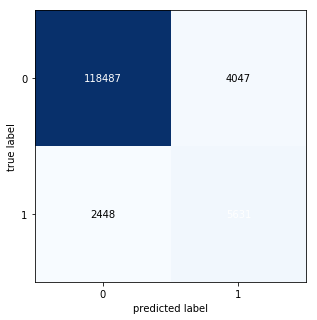

In [58]:
# From above, we can see that F1 score is highest at a threshold of 0.3
pred_val_labels=(pred_noemb_val_labels>0.3).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_val_labels))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_val_labels))
CM = confusion_matrix(val_labels, pred_val_labels)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## **Bidirectional GRU**

In [0]:
#Building the Bidirectional GRU Model
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.CuDNNGRU(64)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [60]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model_gru.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
num_epochs = 5
history_gru=model_gru.fit(train_padded, train_labels, epochs=num_epochs, batch_size=512, validation_data=(val_padded,val_labels),callbacks=[reduce],verbose=1)

Train on 1175509 samples, validate on 130613 samples
Epoch 1/5
1175509/1175509 [==============================] - 87s 74us/sample - loss: 0.1283 - acc: 0.9518 - val_loss: 0.1185 - val_acc: 0.9544
Epoch 2/5
1175509/1175509 [==============================] - 85s 72us/sample - loss: 0.1167 - acc: 0.9556 - val_loss: 0.1145 - val_acc: 0.9552
Epoch 3/5
1175509/1175509 [==============================] - 85s 73us/sample - loss: 0.1123 - acc: 0.9575 - val_loss: 0.1144 - val_acc: 0.9556
Epoch 4/5
1175509/1175509 [==============================] - 85s 73us/sample - loss: 0.1082 - acc: 0.9590 - val_loss: 0.1138 - val_acc: 0.9558
Epoch 5/5
1175509/1175509 [==============================] - 85s 72us/sample - loss: 0.1044 - acc: 0.9607 - val_loss: 0.1145 - val_acc: 0.9553


In [61]:
#Determining the optimal threshold value to seggregate the classes
pred_noemb_val_labels_gru = model_gru.predict(val_padded, batch_size=512,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.5, 0.05):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred_noemb_val_labels_gru>thresh).astype(int))))

130613/130613 [==============================] - 4s 28us/sample
F1 score at threshold 0.1 is 0.5667595642259944
F1 score at threshold 0.15 is 0.5974512743628185
F1 score at threshold 0.2 is 0.6156966132630298
F1 score at threshold 0.25 is 0.6243621756595376
F1 score at threshold 0.3 is 0.6278078562377607
F1 score at threshold 0.35 is 0.6244746299567522
F1 score at threshold 0.4 is 0.6158501255391746
F1 score at threshold 0.45 is 0.6017133532771282


              precision    recall  f1-score   support

           0       0.98      0.97      0.97    122534
           1       0.59      0.67      0.63      8079

    accuracy                           0.95    130613
   macro avg       0.78      0.82      0.80    130613
weighted avg       0.95      0.95      0.95    130613

[[118701   3833]
 [  2629   5450]]


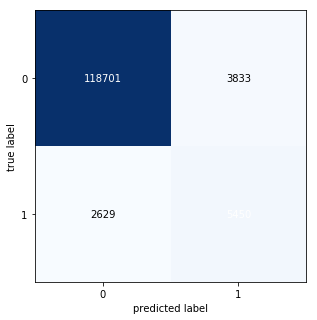

In [62]:
# From above, we can see that F1 score is highest at a threshold of 0.3
pred_val_labels_gru=(pred_noemb_val_labels_gru>0.3).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_val_labels_gru))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_val_labels_gru))
CM = confusion_matrix(val_labels, pred_val_labels_gru)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

# **Pretrained Word Embeddings**

## **fastText**

**wiki-news-300d-1M**

In [0]:
# Loading the pretrained vectors
embeddings_index = {}
import numpy as np
with open('/tmp/quora/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec') as f:
    for line in f:
      try:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
      except:
        continue

In [0]:
# Creating an embedding matrix that contains the vectors of the words in the dataset
embeddings_matrix = np.zeros((vocab_len+2, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embeddings_matrix[i] = embedding_vector

In [0]:
embeddings_matrix=np.delete(embeddings_matrix, 1, 0)

In [91]:
print('Shape of Embedding Matrix: ',embeddings_matrix.shape)

Shape of Embedding Matrix:  (50000, 300)


In [0]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length, weights = [embeddings_matrix], trainable = False),
    tf.keras.layers.Bidirectional(tf.keras.layers.CuDNNLSTM(64)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [93]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model2.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
num_epochs = 5
history2=model2.fit(train_padded, 
                    train_labels, 
                    epochs=num_epochs, 
                    batch_size=1024, 
                    validation_data=(val_padded,val_labels),
                    callbacks=[reduce],
                    verbose=1)

Train on 1175509 samples, validate on 130613 samples
Epoch 1/5
1175509/1175509 [==============================] - 404s 344us/sample - loss: 0.1785 - acc: 0.9406 - val_loss: 0.1582 - val_acc: 0.9445
Epoch 2/5
1175509/1175509 [==============================] - 407s 346us/sample - loss: 0.1508 - acc: 0.9464 - val_loss: 0.1467 - val_acc: 0.9464
Epoch 3/5
1175509/1175509 [==============================] - 407s 346us/sample - loss: 0.1366 - acc: 0.9495 - val_loss: 0.1311 - val_acc: 0.9504
Epoch 4/5
1175509/1175509 [==============================] - 403s 342us/sample - loss: 0.1344 - acc: 0.9488 - val_loss: 0.1300 - val_acc: 0.9511
Epoch 5/5
1175509/1175509 [==============================] - 397s 338us/sample - loss: 0.1252 - acc: 0.9523 - val_loss: 0.1233 - val_acc: 0.9524


In [94]:
#Determining the optimal threshold value to seggregate the classes
pred_ft_val_labels = model2.predict(val_padded, batch_size=1024,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.5, 0.05):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred_ft_val_labels>thresh).astype(int))))

130613/130613 [==============================] - 18s 135us/sample
F1 score at threshold 0.1 is 0.5136907939897796
F1 score at threshold 0.15 is 0.5558180227471565
F1 score at threshold 0.2 is 0.5826771653543308
F1 score at threshold 0.25 is 0.5963060686015832
F1 score at threshold 0.3 is 0.602241847826087
F1 score at threshold 0.35 is 0.5973025048169557
F1 score at threshold 0.4 is 0.5898995071369135
F1 score at threshold 0.45 is 0.5731335186817658


              precision    recall  f1-score   support

           0       0.97      0.97      0.97    122508
           1       0.58      0.61      0.60      8105

    accuracy                           0.95    130613
   macro avg       0.78      0.79      0.78    130613
weighted avg       0.95      0.95      0.95    130613

[[118965   3543]
 [  3145   4960]]


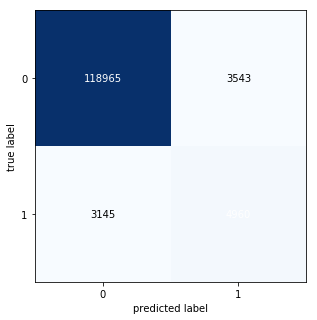

In [96]:
#From above, we can see that F1 score is highest at a threshold of 0.35
pred_ft_val_labels=(pred_ft_val_labels>0.3).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_ft_val_labels))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_ft_val_labels))
CM = confusion_matrix(val_labels, pred_ft_val_labels)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**crawl-300d-2M**

In [0]:
# Unzipping the fasttext pretrained model from Google Drive
import os
import zipfile

local_zip='/content/drive/My Drive/crawl-300d-2M.vec.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/crawl-300d-2M.vec')
zip_ref.close()

In [0]:
# Loading the pretrained vectors
embeddings_index = {}
import numpy as np
with open('/content/drive/My Drive/crawl-300d-2M.vec/crawl-300d-2M.vec') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [0]:
# Creating an embedding matrix that contains the vectors of the words in the dataset
embeddings_matrix = np.zeros((vocab_len+2, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [0]:
embeddings_matrix=np.delete(embeddings_matrix, 1, 0)

In [28]:
print('Shape of the Embeddings Matrix: ',embeddings_matrix.shape)

Shape of the Embeddings Matrix:  (50000, 300)


In [0]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length, weights = [embeddings_matrix], trainable = False),
    tf.keras.layers.Bidirectional(tf.keras.layers.CuDNNLSTM(64)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [39]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model3.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
num_epochs = 5
history3=model3.fit(train_padded, 
                    train_labels, 
                    epochs=num_epochs, 
                    batch_size=512, 
                    validation_data=(val_padded,val_labels),
                    callbacks=[reduce],
                    verbose=1)

Train on 1175509 samples, validate on 130613 samples
Epoch 1/5
1175509/1175509 [==============================] - 79s 67us/sample - loss: 0.1593 - acc: 0.9448 - val_loss: 0.1368 - val_acc: 0.9494
Epoch 2/5
1175509/1175509 [==============================] - 78s 66us/sample - loss: 0.1306 - acc: 0.9510 - val_loss: 0.1278 - val_acc: 0.9516
Epoch 3/5
1175509/1175509 [==============================] - 77s 66us/sample - loss: 0.1223 - acc: 0.9528 - val_loss: 0.1205 - val_acc: 0.9534
Epoch 4/5
1175509/1175509 [==============================] - 78s 66us/sample - loss: 0.1199 - acc: 0.9524 - val_loss: 0.1191 - val_acc: 0.9535
Epoch 5/5
1175509/1175509 [==============================] - 78s 66us/sample - loss: 0.1123 - acc: 0.9556 - val_loss: 0.1180 - val_acc: 0.9539


In [40]:
#Determining the optimal threshold value to seggregate the classes
pred_ft3_val_labels = model3.predict(val_padded, batch_size=512,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.5, 0.05):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred_ft3_val_labels>thresh).astype(int))))

130613/130613 [==============================] - 4s 30us/sample
F1 score at threshold 0.1 is 0.5350188442211055
F1 score at threshold 0.15 is 0.5734420707384097
F1 score at threshold 0.2 is 0.5965715398850687
F1 score at threshold 0.25 is 0.6072972687967942
F1 score at threshold 0.3 is 0.6121849214422967
F1 score at threshold 0.35 is 0.6115164305094964
F1 score at threshold 0.4 is 0.5997158357013691
F1 score at threshold 0.45 is 0.5805020108168077


              precision    recall  f1-score   support

           0       0.98      0.97      0.97    122534
           1       0.56      0.67      0.61      8079

    accuracy                           0.95    130613
   macro avg       0.77      0.82      0.79    130613
weighted avg       0.95      0.95      0.95    130613

[[118335   4199]
 [  2663   5416]]


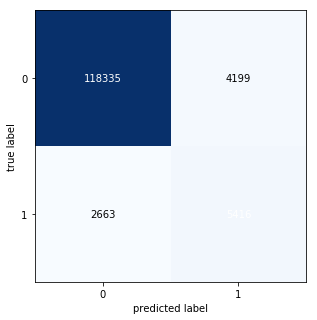

In [41]:
#From above, we can see that F1 score is highest at a threshold of 0.3
pred_ft3_val_labels=(pred_ft3_val_labels>0.3).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_ft3_val_labels))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_ft3_val_labels))
CM = confusion_matrix(val_labels, pred_ft3_val_labels)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [0]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length, weights = [embeddings_matrix], trainable = False),
    tf.keras.layers.Bidirectional(tf.keras.layers.CuDNNGRU(64)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model4.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
num_epochs = 5
history4=model4.fit(train_padded, 
                    train_labels, 
                    epochs=num_epochs, 
                    batch_size=512, 
                    validation_data=(val_padded,val_labels),
                    callbacks=[reduce],
                    verbose=1)

Train on 1175509 samples, validate on 130613 samples
Epoch 1/5
1175509/1175509 [==============================] - 68s 58us/sample - loss: 0.1542 - acc: 0.9459 - val_loss: 0.1382 - val_acc: 0.9492
Epoch 2/5
1175509/1175509 [==============================] - 66s 57us/sample - loss: 0.1283 - acc: 0.9515 - val_loss: 0.1248 - val_acc: 0.9522
Epoch 3/5
1175509/1175509 [==============================] - 66s 56us/sample - loss: 0.1207 - acc: 0.9534 - val_loss: 0.1207 - val_acc: 0.9534
Epoch 4/5
1175509/1175509 [==============================] - 66s 56us/sample - loss: 0.1159 - acc: 0.9548 - val_loss: 0.1183 - val_acc: 0.9541
Epoch 5/5
1175509/1175509 [==============================] - 66s 56us/sample - loss: 0.1121 - acc: 0.9558 - val_loss: 0.1184 - val_acc: 0.9547


In [44]:
#Determining the optimal threshold value to seggregate the classes
pred_ft4_val_labels = model4.predict(val_padded, batch_size=512,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.5, 0.05):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred_ft4_val_labels>thresh).astype(int))))

130613/130613 [==============================] - 3s 27us/sample
F1 score at threshold 0.1 is 0.5517440184491208
F1 score at threshold 0.15 is 0.5838901601830664
F1 score at threshold 0.2 is 0.6016881827209534
F1 score at threshold 0.25 is 0.610668366804803
F1 score at threshold 0.3 is 0.6135282121006117
F1 score at threshold 0.35 is 0.6142754145638067
F1 score at threshold 0.4 is 0.6062571537581075
F1 score at threshold 0.45 is 0.596748185971513


              precision    recall  f1-score   support

           0       0.98      0.97      0.97    122534
           1       0.60      0.63      0.61      8079

    accuracy                           0.95    130613
   macro avg       0.79      0.80      0.79    130613
weighted avg       0.95      0.95      0.95    130613

[[119081   3453]
 [  2967   5112]]


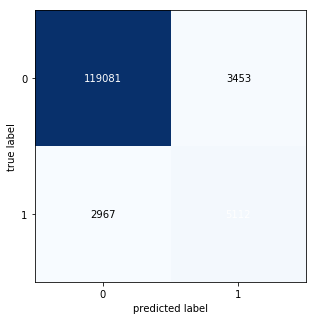

In [45]:
#From above, we can see that F1 score is highest at a threshold of 0.35
pred_ft4_val_labels=(pred_ft4_val_labels>0.35).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_ft4_val_labels))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_ft4_val_labels))
CM = confusion_matrix(val_labels, pred_ft4_val_labels)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()